In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [2]:
from nachbarstrom import LocalImgDataProvider
from tf_unet import unet
from tf_unet import util

In [3]:
basedir = "/home/tomas_ruiz_te_gmail_com/labelbox-download/"
generator = LocalImgDataProvider(basedir=basedir)

In [33]:
x_test, y_test = generator(1)

In [34]:
y_test[:,:,].shape

(1, 640, 640, 2)

Text(0.5,1,'Not Suitable Area')

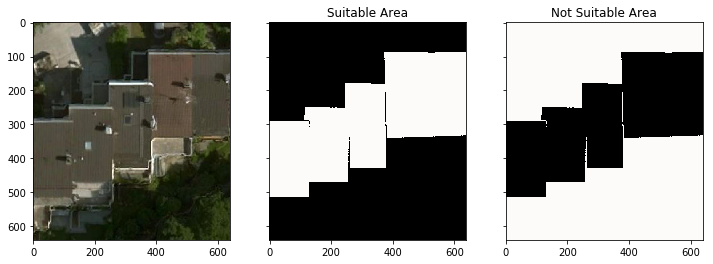

In [35]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,4))
ax[0].imshow(x_test[0,...], aspect="auto")
ax[1].imshow(y_test[0,...,0], aspect="auto"); ax[1].set_title("Suitable Area")
ax[2].imshow(y_test[0,...,1], aspect="auto"); ax[2].set_title("Not Suitable Area")

In [8]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=5, features_root=32, cost="dice_coefficient")

2018-09-10 12:23:28,232 Layers 5, features 32, filter size 3x3, pool size: 2x2


In [9]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [10]:
path = trainer.train(generator, "./unet_trained", training_iters=20, epochs=200, display_step=40, restore=False)

2018-09-10 12:23:35,993 Removing '/home/tomas_ruiz_te_gmail_com/python-nachbarstrom-dl-unet/demo/prediction'
2018-09-10 12:23:36,008 Removing '/home/tomas_ruiz_te_gmail_com/python-nachbarstrom-dl-unet/demo/unet_trained'
2018-09-10 12:23:36,034 Allocating '/home/tomas_ruiz_te_gmail_com/python-nachbarstrom-dl-unet/demo/prediction'
2018-09-10 12:23:36,035 Allocating '/home/tomas_ruiz_te_gmail_com/python-nachbarstrom-dl-unet/demo/unet_trained'
2018-09-10 12:23:46,464 Verification error= 35.6%, loss= -0.5027
2018-09-10 12:23:47,401 Start optimization
2018-09-10 12:23:57,208 Iter 0, Minibatch Loss= -0.5040, Training Accuracy= 0.5835, Minibatch error= 41.7%
2018-09-10 12:24:07,480 Epoch 0, Average loss: -0.5280, learning rate: 0.2000
2018-09-10 12:24:08,348 Verification error= 35.6%, loss= -0.6055
2018-09-10 12:24:19,896 Epoch 1, Average loss: -0.5911, learning rate: 0.1900
2018-09-10 12:24:20,759 Verification error= 35.6%, loss= -0.6422
2018-09-10 12:24:23,658 Iter 40, Minibatch Loss= -0.407

2018-09-10 12:32:47,325 Verification error= 35.6%, loss= -0.6441
2018-09-10 12:32:59,772 Epoch 39, Average loss: -0.6250, learning rate: 0.0271
2018-09-10 12:33:00,624 Verification error= 35.6%, loss= -0.6441
2018-09-10 12:33:04,047 Iter 800, Minibatch Loss= -0.5063, Training Accuracy= 0.5063, Minibatch error= 49.4%
2018-09-10 12:33:14,249 Epoch 40, Average loss: -0.6005, learning rate: 0.0257
2018-09-10 12:33:15,104 Verification error= 35.6%, loss= -0.6441
2018-09-10 12:33:27,590 Epoch 41, Average loss: -0.6076, learning rate: 0.0244
2018-09-10 12:33:28,441 Verification error= 35.6%, loss= -0.6441
2018-09-10 12:33:31,894 Iter 840, Minibatch Loss= -0.5835, Training Accuracy= 0.5835, Minibatch error= 41.7%
2018-09-10 12:33:42,146 Epoch 42, Average loss: -0.6003, learning rate: 0.0232
2018-09-10 12:33:43,002 Verification error= 35.6%, loss= -0.6441
2018-09-10 12:33:55,630 Epoch 43, Average loss: -0.6011, learning rate: 0.0220
2018-09-10 12:33:56,485 Verification error= 35.6%, loss= -0.64

KeyboardInterrupt: 

In [11]:
x_test, y_test = generator(1)
prediction = net.predict("./unet_trained/model.ckpt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2018-09-10 12:36:44,427 Restoring parameters from ./unet_trained/model.ckpt
2018-09-10 12:36:44,730 Model restored from file: ./unet_trained/model.ckpt


In [29]:
mask_1 = prediction[0,...,0]
mask_2 = prediction[0,...,1]
print(mask_1.min(), mask_1.max())
print(mask_2.min(), mask_2.max())

1.3042397e-07 8.702859e-05
0.999913 0.9999999


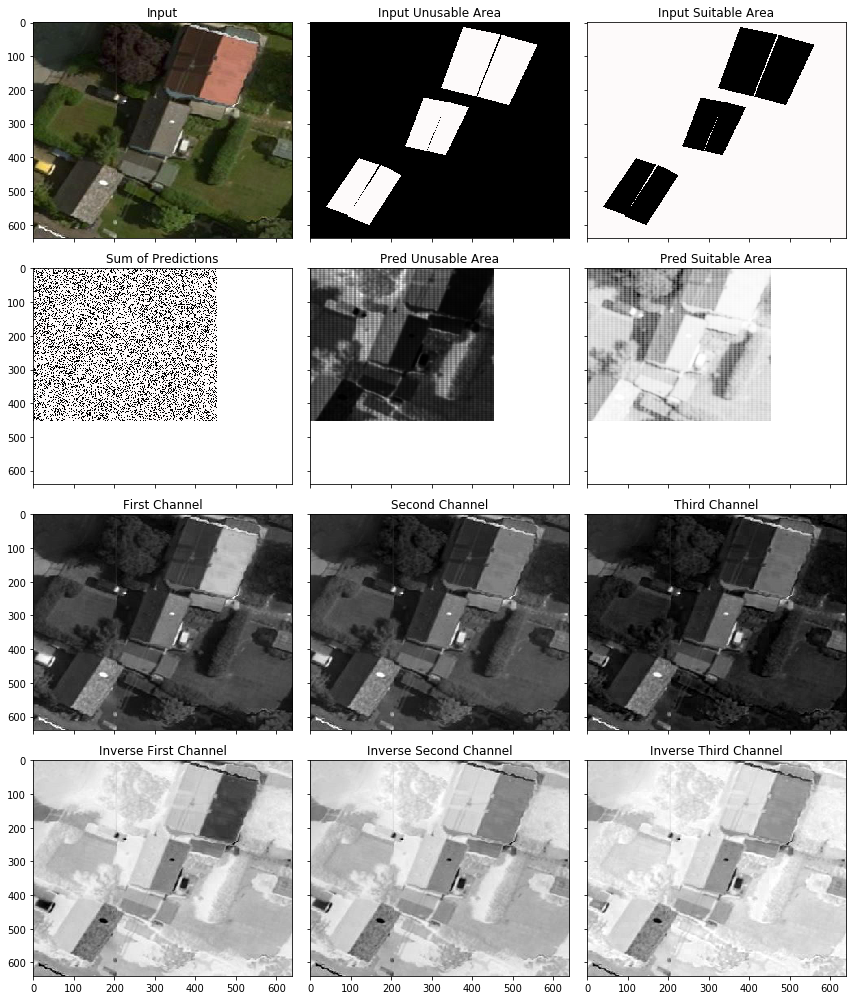

In [26]:
fig, ax = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(12, 14))
ax[0, 0].imshow(x_test[0,...], aspect="auto"); ax[0, 0].set_title("Input")
ax[0, 1].imshow(y_test[0,...,0], aspect="auto"); ax[0, 1].set_title("Input Unusable Area")
ax[0, 2].imshow(y_test[0,...,1], aspect="auto"); ax[0, 2].set_title("Input Suitable Area")

ax[1, 0].imshow(mask_1 + mask_2, aspect="auto"); ax[1, 0].set_title("Sum of Predictions")
ax[1, 1].imshow(mask_1, aspect="auto", cmap="gray"); ax[1, 1].set_title("Pred Unusable Area")
ax[1, 2].imshow(mask_2, aspect="auto", cmap="gray"); ax[1, 2].set_title("Pred Suitable Area")

ax[2, 0].imshow(x_test[0,...,0], aspect="auto", cmap="gray"); ax[2, 0].set_title("First Channel")
ax[2, 1].imshow(x_test[0,...,1], aspect="auto", cmap="gray"); ax[2, 1].set_title("Second Channel")
ax[2, 2].imshow(x_test[0,...,2], aspect="auto", cmap="gray"); ax[2, 2].set_title("Third Channel")

ax[3, 0].imshow(1 - x_test[0,...,0], aspect="auto", cmap="gray"); ax[3, 0].set_title("Inverse First Channel")
ax[3, 1].imshow(1 - x_test[0,...,1], aspect="auto", cmap="gray"); ax[3, 1].set_title("Inverse Second Channel")
ax[3, 2].imshow(1 - x_test[0,...,2], aspect="auto", cmap="gray"); ax[3, 2].set_title("Inverse Third Channel")

fig.tight_layout()
# fig.savefig("nachbarstrom-evaluation.png")

# exploration

In [ ]:
a = mask_1, mask_2, np.zeros(mask_1.shape)

In [ ]:
b = np.stack(a, axis=2)

In [ ]:
b.shape

In [ ]:
plt.imshow(b)

In [ ]:
mask_1.min(), mask_1.max()

In [ ]:
mask_2.min(), mask_2.max()

In [ ]:
mask_1.sum(), mask_2.sum()

In [ ]:
np.multiply(*b.shape[:2])

In [ ]:
np.sum(mask_1 + mask_2)